In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

```console
# Supplementary Fig SX
# Count the number of soluble and insoluble proteins by genus
awk '!/species/{print $2,$NF}' sol_by_species.txt | sort | uniq -c | sort -k1,1nr | awk 'BEGIN{OFS="\t"} {print $1,$2,$3}' > sol_by_genus.txt
```

In [2]:
count = pd.read_csv('sol_by_genus.txt', sep='\t', header=None)
count = pd.merge(count[count[2]=='1'], count[count[2]=='2'], on=1)

In [3]:
count.drop(['2_x','2_y'], axis=1, inplace=True)

In [4]:
count.columns = ['Insoluble', 'Genus', 'Soluble']
count = count.set_index('Genus')

In [5]:
count['Total'] = count['Insoluble'] + count['Soluble']
count['Insoluble (%)'] = count['Insoluble']*100 / (count['Insoluble'] + count['Soluble'])
count['Soluble (%)'] = count['Soluble']*100 / (count['Insoluble'] + count['Soluble'])

In [6]:
d = count[count['Total']>=20]
d = d.loc[d.index!='Unknown']
d = d[['Insoluble (%)', 'Soluble (%)', 'Total']]

In [7]:
o = count[count['Total']<20]
u = count.loc[count.index=='Unknown']
ou = pd.concat([u,o])
ou = pd.DataFrame({'Others':ou.sum()}).T
ou['Insoluble (%)'] = ou['Insoluble']*100 / (ou['Insoluble'] + ou['Soluble'])
ou['Soluble (%)'] = ou['Soluble']*100 / (ou['Insoluble'] + ou['Soluble'])

In [8]:
ou = ou[['Insoluble (%)', 'Soluble (%)', 'Total']]

In [9]:
d = pd.concat([d,ou], sort=True).sort_values('Insoluble (%)')

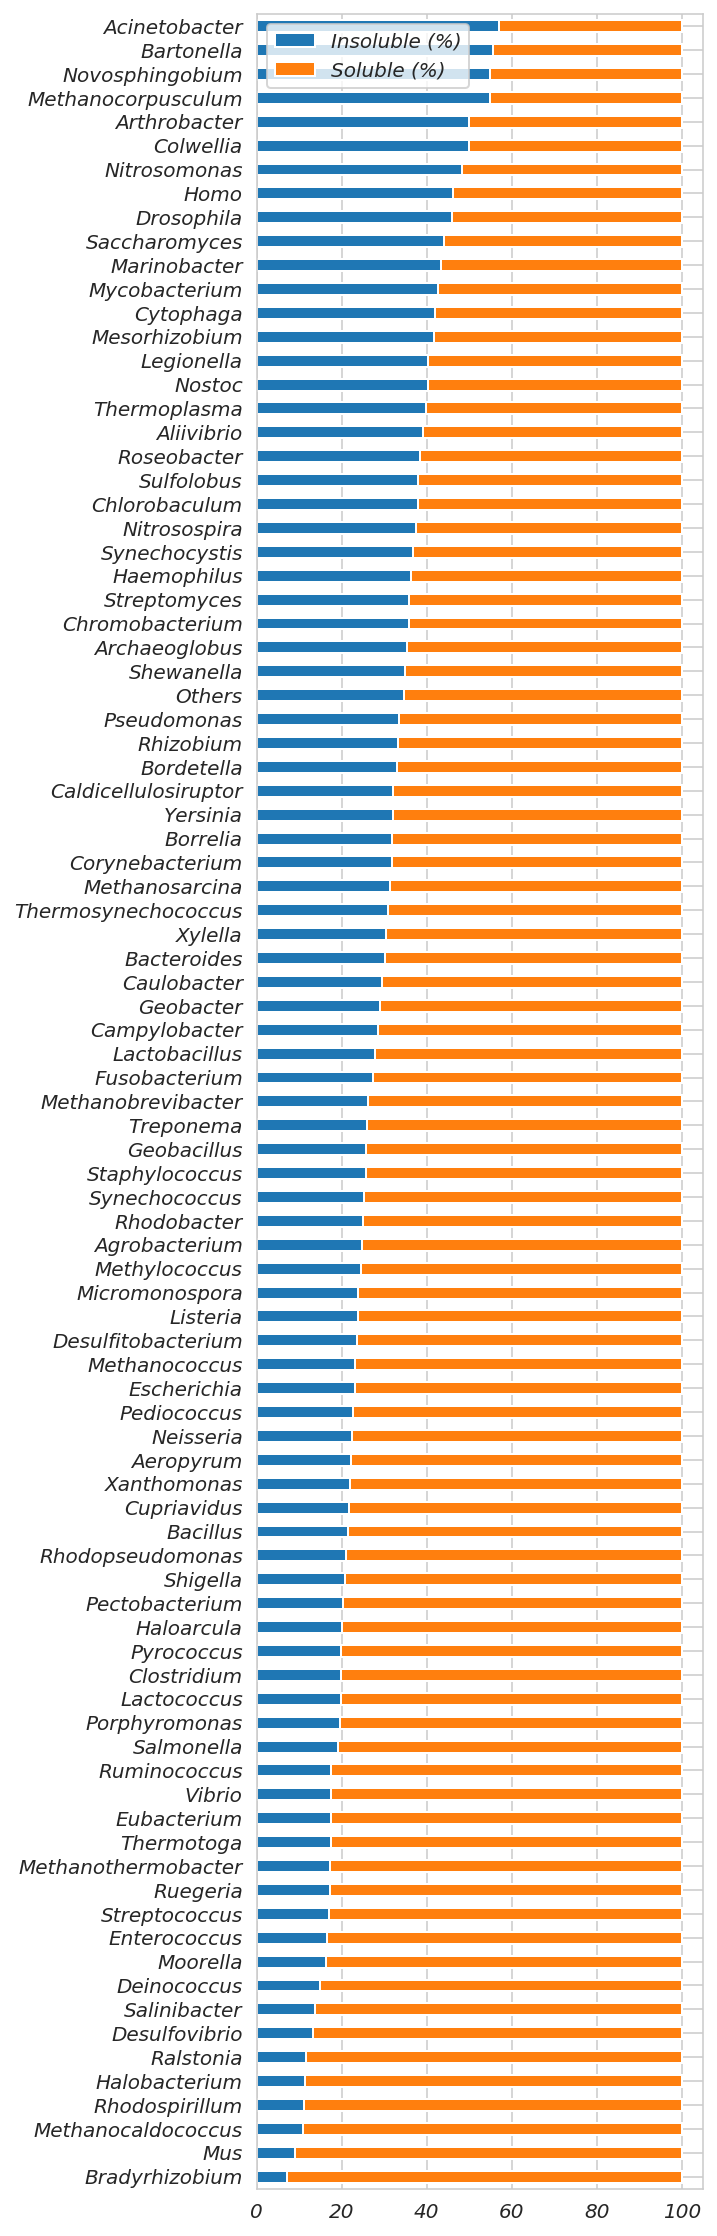

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(4,20)
plt.rcParams['font.style']='italic'
d[['Insoluble (%)', 'Soluble (%)']].plot.barh(stacked=True)
# plt.savefig('ratio.pdf')

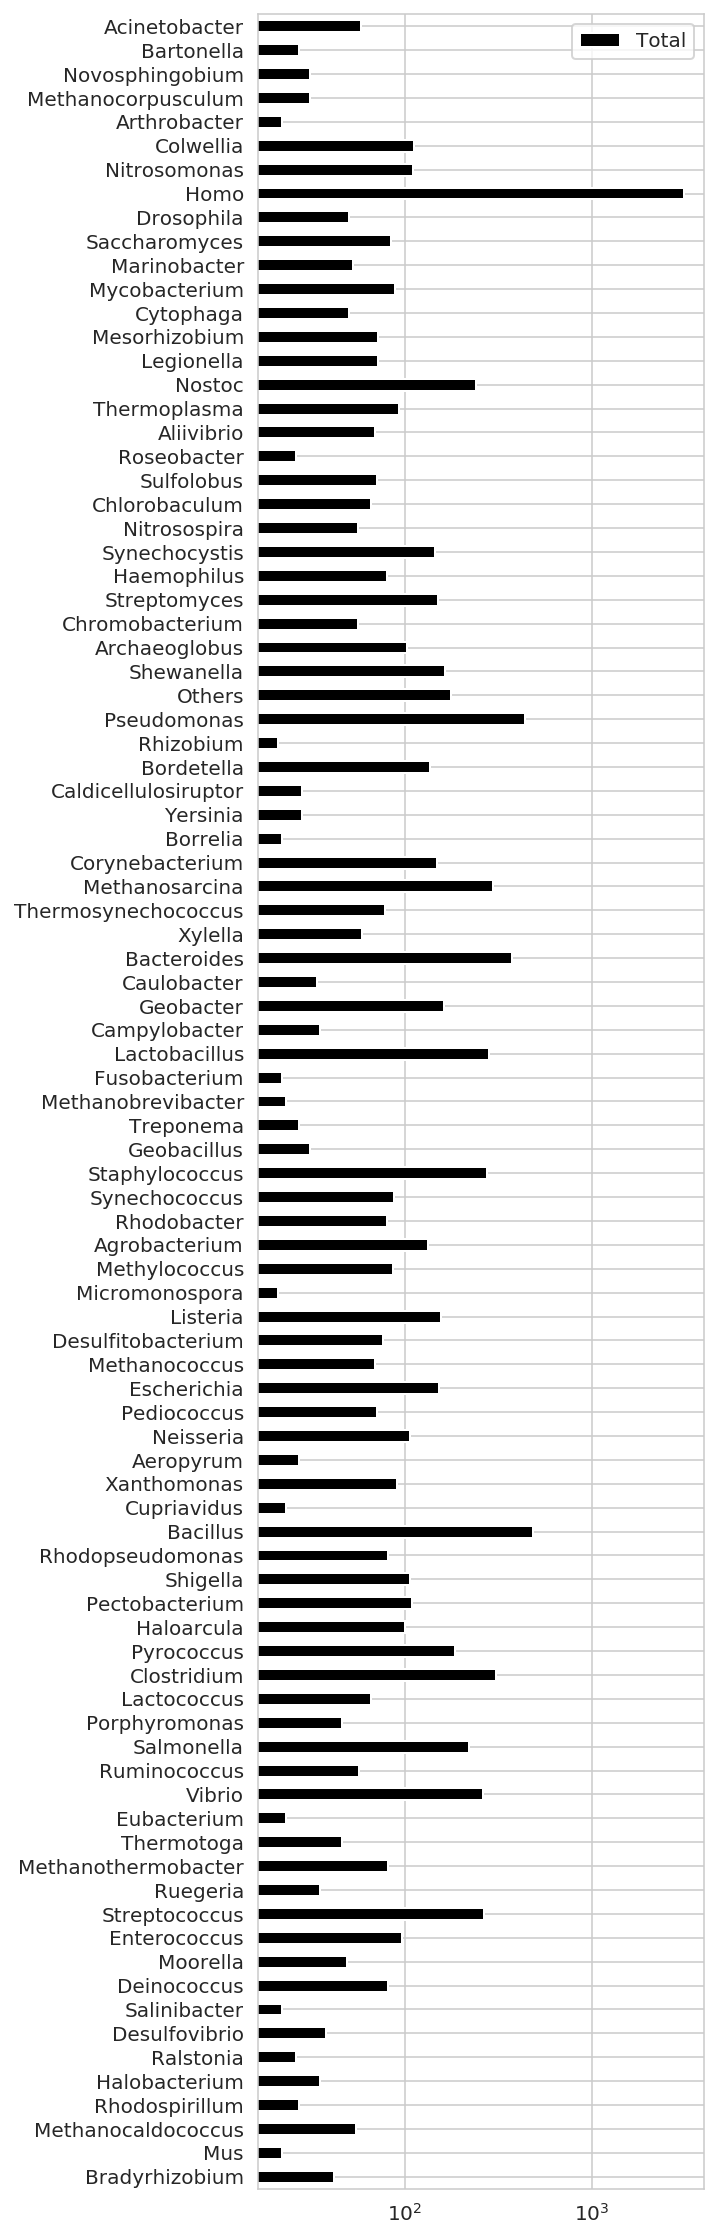

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(4,20)
plt.rcParams['font.style']='normal'
d[['Total']].plot.barh(color='black', logx=True)
# plt.savefig('frequency.pdf')